In [4]:
import mygene
from tqdm import tqdm
import pandas as pd

In [5]:
!pwd


/12tb_dsk1/danish/Analysis_GRN_ROSMAP/GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/community_detection_Tf/differential_expression_analysis


In [6]:
!ls /12tb_dsk1/danish//Gene_Regulatory_Network_ROSMAP/code/preprocessing_18_dec

 Dashboard_clnical_data
 Machine_learning_and_PCA_on_expression_data.ipynb
 clinical_data_AD_NCI_preprocessed.csv
 clinical_data_AD_NCI_preprocessed_removed_batch_0.csv
 clinical_data_AD_NCI_raw.csv
 count_matrix_AD_NCI_preprocessed.csv
 count_matrix_AD_NCI_preprocessed_removed_batch_0.csv
 count_matrix_AD_NCI_raw.csv
 count_matrix_after_iteration_1_batch.csv
 count_matrix_after_iteration_2_batch.csv
 count_matrix_after_iteration_3_batch.csv
 count_matrix_combatseq_sub_batch_corrected.csv
 cy-style.json
 data.json
 data_preprocessing.ipynb
 final_preprocessed_clinical_data.csv
 final_preprocessed_count_matrix.csv
 final_preprocessed_count_matrix_mrn_normalized.csv
 model_best_logistic_regression.sav
'pca_batch(filtered_ad_non_ad_mrn_batch_corrected).html'


In [15]:
count_matrix = pd.read_csv('/12tb_dsk1/danish/GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/Preprocessed_all_data/count_matrix_mrn.csv',index_col=0)

In [16]:
count_matrix

,23_120411,591_120522,691_120605,588_120522,604_120523,545_120516,364_120502,705_120605,711_120531,602_120523,...,628_120524,587_120522,168_120423,283_120430,721_120531,677_120604,142_120419,120_120418,483_120515,174_120424
symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,186.219072,148.783568,217.108458,275.061412,111.437481,130.201294,293.148548,184.453076,222.371703,139.229106,...,119.582613,109.429352,145.564233,116.265930,365.182344,281.077388,231.253508,194.880503,126.389504,243.490298
ENSG00000000419,369.092891,294.127054,325.662687,350.679670,343.200096,306.515546,296.060619,270.746913,319.447674,312.432779,...,296.846250,242.485496,354.175395,299.130790,251.661241,357.620784,382.457726,244.575031,300.175071,282.227391
ENSG00000000457,137.155364,129.003094,134.053544,113.427387,179.804034,161.395354,150.457036,140.227485,141.098796,124.573411,...,102.700362,85.802560,117.749412,120.781111,157.288276,82.817445,142.309851,110.107484,105.601756,141.113696
ENSG00000000460,42.373202,25.800619,31.327730,29.302075,42.387263,42.044168,33.974169,39.910900,30.477340,31.309895,...,16.882251,36.061946,38.013590,22.575909,53.341241,28.860625,34.306839,28.257673,22.450767,30.436287
ENSG00000000938,233.052611,205.544929,121.668163,150.291287,142.886096,249.552480,186.372587,243.780089,448.129776,213.173751,...,234.944663,184.040274,137.219787,106.106771,376.124137,189.476275,216.006024,371.247358,244.463908,391.060176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283050,113.738595,79.121897,74.312291,103.975104,72.468546,85.444599,111.629414,65.799051,94.818391,90.598844,...,57.681025,99.481229,58.411125,53.053385,98.476138,81.562635,82.590539,118.877107,80.656459,87.619615
ENSG00000283071,18.956432,33.540804,65.569668,24.575934,88.192853,40.687904,27.179336,46.382937,23.704598,17.320367,...,53.460462,37.305461,32.450625,36.121454,27.354483,25.096195,40.659958,28.257673,29.934356,35.047846
ENSG00000283078,73.595561,45.581093,29.142075,55.768465,44.438259,62.388120,73.772482,43.146918,50.795567,61.953621,...,45.019337,67.149830,76.027179,72.242908,41.031724,69.014537,43.201205,51.643333,65.689281,64.561822


In [13]:
raw_count_matrix = pd.read_csv('/12tb_dsk1/danish/Gene_Regulatory_Network_ROSMAP/ROSMAP_DATA/ROSMAP_all_counts_matrix.txt',delimiter='\t')

In [23]:
raw_count_matrix = raw_count_matrix.iloc[4:]
raw_count_matrix

,feature,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
4,ENSG00000223972.5,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ENSG00000227232.5,99,174,78,188,56,81,87,157,136,...,83,188,256,91,413,93,98,171,236,322
6,ENSG00000278267.1,2,5,5,4,2,1,1,2,2,...,0,6,4,3,10,0,1,7,3,8
7,ENSG00000243485.3,0,5,2,5,3,0,0,0,0,...,3,0,0,6,2,1,2,2,2,2
8,ENSG00000274890.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60724,ENSG00000277374.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60725,ENSG00000278806.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60726,ENSG00000274152.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60727,ENSG00000276666.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def return_gene(x):
    return x.split('.')[0]

In [25]:
raw_count_matrix['index'] = raw_count_matrix.feature.apply(return_gene)
raw_count_matrix

/tmp/ipykernel_551626/3692954696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_count_matrix['index'] = raw_count_matrix.feature.apply(return_gene)


,feature,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,...,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501,index
4,ENSG00000223972.5,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,ENSG00000223972
5,ENSG00000227232.5,99,174,78,188,56,81,87,157,136,...,188,256,91,413,93,98,171,236,322,ENSG00000227232
6,ENSG00000278267.1,2,5,5,4,2,1,1,2,2,...,6,4,3,10,0,1,7,3,8,ENSG00000278267
7,ENSG00000243485.3,0,5,2,5,3,0,0,0,0,...,0,0,6,2,1,2,2,2,2,ENSG00000243485
8,ENSG00000274890.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000274890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60724,ENSG00000277374.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277374
60725,ENSG00000278806.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000278806
60726,ENSG00000274152.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000274152
60727,ENSG00000276666.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000276666


In [26]:
raw_count_matrix.set_index('index', inplace = True)
raw_count_matrix.drop(columns=['feature'], inplace = True)
raw_count_matrix

/tmp/ipykernel_551626/3146017220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_count_matrix.drop(columns=['feature'], inplace = True)


,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,102_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
index,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000227232,99,174,78,188,56,81,87,157,136,102,...,83,188,256,91,413,93,98,171,236,322
ENSG00000278267,2,5,5,4,2,1,1,2,2,4,...,0,6,4,3,10,0,1,7,3,8
ENSG00000243485,0,5,2,5,3,0,0,0,0,3,...,3,0,0,6,2,1,2,2,2,2
ENSG00000274890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000277374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000278806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000274152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
ount_matrix = raw_count_matrix.loc[count_matrix.index,]

In [29]:
AD_filtered_data = pd.read_csv('../../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/communtiy_detection/AD_filtered_data.csv', index_col=0)

In [30]:
count_matrix =count_matrix[AD_filtered_data.columns]

In [31]:
count_matrix = count_matrix.T 
count_matrix

symbol,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282865,ENSG00000282936,ENSG00000282951,ENSG00000283041,ENSG00000283045,ENSG00000283050,ENSG00000283071,ENSG00000283078,ENSG00000283103,ENSG00000283108
02_120405,97.249757,387.307730,125.156210,35.517303,144.606161,207.184266,167.438713,438.046733,239.318968,549.672542,...,21.986902,168.284363,38.054253,69.343305,27.060802,60.041155,51.584654,72.725906,59.195505,23.678202
292_120430,336.276403,269.269297,151.386425,31.021808,338.758147,315.181573,153.868169,562.115167,310.218084,378.466062,...,35.985298,183.649105,40.948787,70.729723,42.189659,85.620191,53.357510,47.153149,65.766234,34.744425
630_120524,179.713548,226.952538,128.366820,37.996579,382.019657,1360.688294,262.895248,527.844365,375.858050,321.430518,...,45.185121,128.366820,42.104317,95.504914,55.454466,97.558783,124.259082,48.265924,51.346728,20.538691
706_120605,324.701977,319.079432,116.667810,35.140907,285.344162,601.612321,220.684894,915.069208,342.975249,333.135795,...,37.952179,160.242534,28.112725,78.715631,33.735270,137.752354,25.301453,44.980360,46.385997,25.301453
550_120517,220.739429,272.629668,116.958951,34.593493,317.930670,623.506521,215.797501,692.693507,268.511395,376.410146,...,27.180601,210.031919,36.240802,67.539676,36.240802,66.716021,23.885983,49.419275,42.006384,23.885983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197_120424,190.706531,347.599847,156.893316,43.280915,139.986709,332.722032,196.116645,641.098550,286.736060,467.974891,...,17.582872,158.245845,29.079365,55.453672,20.287929,85.885565,29.755629,59.511258,61.540051,20.287929
363_120502,241.571322,221.271211,136.010744,37.555206,429.347350,691.218784,211.121156,632.348461,300.441645,332.921822,...,44.660244,175.595961,48.720267,71.050389,51.765283,134.995739,24.360133,58.870322,78.155428,24.360133
34_120416,186.830677,281.272558,120.105435,19.504301,259.715172,251.502835,148.848616,369.555185,183.751051,468.103235,...,42.088229,166.299833,61.592531,93.415339,70.831411,74.937579,20.530844,55.433278,82.123375,23.610470
254_120426,232.166134,291.218844,106.780243,51.772239,374.539791,440.064031,188.483308,667.376518,258.861195,292.027785,...,30.739767,117.296479,35.593414,62.288475,42.064944,115.678596,25.886119,58.243769,56.625886,29.930826


In [32]:
import pickle

# Step 4: Load the list from the pickle file
with open('../../data_output/cluster_list.pkl', 'rb') as file:
    cluster_list = pickle.load(file)

print("List loaded from my_list.pkl:")
print(cluster_list)

List loaded from my_list.pkl:
[['254_120426.csv', '289_120430.csv', '364_120502.csv', '607_120523.csv', '173_120424.csv', '721_120531.csv', '497_120515.csv', '494_120515.csv', '70_120417.csv', '214_120425.csv', '369_120502.csv', '355_120501.csv', '292_120430.csv', '243_120426.csv', '237_120426.csv', '56_120417.csv', '231_120425.csv', '323_120501.csv'], ['545_120516.csv', '434_120507.csv', '708_120531.csv', '711_120531.csv', '28_120411.csv', '706_120605.csv', '181_120424.csv', '420_120507.csv', '286_120430.csv', '469_120514.csv', '628_120524.csv', '606_120523.csv', '429_120507.csv', '942_131101.csv', '646_120524.csv', '76_120417.csv', '186_120424.csv', '321_120501.csv', '604_120523.csv', '531_120516.csv'], ['624_120524.csv', '482_120514.csv', '637_120524.csv', '554_120517.csv', '24_120411.csv', '318_120501.csv', '34_120416.csv', '649_120529.csv', '486_120515.csv', '23_120411.csv', '196_120424.csv', '232_120425.csv', '309_120430.csv', '553_120517.csv', '77_120417.csv', '424_120507.csv', 

In [33]:
def return_cluster(name):
    name = name + '.csv'

    if name in cluster_list[0]:
        return 'A'
    elif name in cluster_list[1]:
        return 'B'
    elif name in cluster_list[2]:
        return 'C'
    

In [34]:
x = []
for i in count_matrix.index:
    x.append(return_cluster(i))

In [35]:
meta_data = pd.DataFrame(x, columns=["condition"], index=count_matrix.index)

In [36]:
count_matrix = count_matrix.T

In [37]:
count_matrix

,02_120405,292_120430,630_120524,706_120605,550_120517,469_120514,628_120524,444_120507,497_120515,554_120517,...,309_120430,173_120424,607_120523,434_120507,942_131101,197_120424,363_120502,34_120416,254_120426,494_120515
symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,97.249757,336.276403,179.713548,324.701977,220.739429,154.968397,119.582613,246.803453,253.627876,157.830507,...,139.536191,218.484545,202.100741,183.168251,198.641448,190.706531,241.571322,186.830677,232.166134,162.970454
ENSG00000000419,387.307730,269.269297,226.952538,319.079432,272.629668,340.027745,296.846250,259.287675,281.945552,243.539790,...,279.072381,218.484545,257.599909,375.707902,287.568143,347.599847,221.271211,281.272558,291.218844,310.989489
ENSG00000000457,125.156210,151.386425,128.366820,116.667810,116.958951,142.932017,102.700362,96.032472,92.340246,146.332921,...,110.330941,125.402372,100.526794,129.495694,139.741949,156.893316,136.010744,120.105435,106.780243,133.067618
ENSG00000000460,35.517303,31.021808,37.996579,35.140907,34.593493,25.577308,16.882251,34.571690,32.011285,27.176114,...,22.715194,33.613007,23.037390,43.449213,31.182088,43.280915,37.555206,19.504301,51.772239,34.388261
ENSG00000000938,144.606161,338.758147,382.019657,285.344162,317.930670,394.191457,234.944663,351.478848,304.107211,347.018069,...,360.198074,292.174599,313.099076,149.942382,234.443104,139.986709,429.347350,259.715172,374.539791,341.639896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283050,60.041155,85.620191,97.558783,137.752354,66.716021,85.759210,57.681025,103.715070,102.189873,87.799752,...,60.573850,100.839021,77.489403,86.046481,88.926695,85.885565,134.995739,74.937579,115.678596,70.271663
ENSG00000283071,51.584654,53.357510,124.259082,25.301453,23.885983,18.054571,53.460462,23.047793,8.618423,37.628465,...,12.980111,51.712318,40.839010,20.446689,18.478274,29.755629,24.360133,20.530844,25.886119,46.349395
ENSG00000283078,72.725906,47.153149,48.265924,44.980360,49.419275,51.154617,45.019337,47.055911,46.785725,53.306993,...,73.553961,63.347590,79.583712,57.932284,51.970146,59.511258,58.870322,55.433278,58.243769,48.592108


In [38]:
count_matrix.to_csv('count_matrix_diff_analysis.csv', index=True)
meta_data.to_csv('meta_data_diff_analysis.csv', index=True)

In [19]:
!pwd

/12tb_dsk1/danish/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf/differential_expression_analysis


In [20]:
count_matrix

,424_120507,444_120507,497_120515,232_120425,602_120523,545_120516,553_120517,711_120531,309_120430,520_120515,...,186_120424,76_120417,469_120514,363_120502,326_120501,591_120522,494_120515,197_120424,407_120503,554_120517
ENSG00000182870,628,1554,1433,2974,3065,824,1220,1132,1243,3304,...,599,1878,720,1769,1805,1941,2753,2125,1053,1717
ENSG00000039523,960,2196,1852,2743,3414,1033,1598,1477,1963,2958,...,727,2134,1088,2371,2110,2544,2800,2538,1424,2030
ENSG00000198142,63,85,65,97,105,51,86,106,77,89,...,51,110,55,112,83,116,171,104,61,70
ENSG00000182366,14,29,31,116,89,14,16,28,15,89,...,10,15,9,34,74,45,129,70,26,43
ENSG00000168490,2815,11549,9530,27287,21563,4935,7388,7415,7831,22714,...,3386,7373,2837,11726,14344,19678,22062,16529,6691,11039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,90,306,261,644,498,265,226,248,370,511,...,149,342,150,369,459,372,369,446,234,439
ENSG00000134824,2090,5358,2336,4753,4732,2089,3289,6162,2360,2839,...,1451,2223,2251,5109,2501,3940,5216,4266,2090,2850
ENSG00000127586,165,346,303,579,439,222,356,234,302,345,...,178,259,101,423,429,420,613,488,202,316
ENSG00000104915,518,1024,731,1174,1093,546,942,653,809,1099,...,456,952,521,932,938,838,1260,976,689,809


In [21]:
result_analysis_A_B = pd.read_csv('./different_expression_output/A_B/results.csv', index_col=0)
result_analysis_A_C = pd.read_csv('./different_expression_output/A_C/results.csv', index_col=0)
result_analysis_B_C = pd.read_csv('./different_expression_output/B_C/results.csv', index_col=0)

In [22]:
result_analysis_A_B.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000170522,381.245826,-0.345143,0.059314,-5.818951,5.921821e-09,0.000103
ENSG00000153714,91.494706,-0.389987,0.081400,-4.790985,1.659647e-06,0.014381
ENSG00000160712,363.692795,0.557109,0.122052,4.564529,5.006178e-06,0.028919
ENSG00000104368,424.795879,0.528593,0.120301,4.393937,1.113158e-05,0.032152
ENSG00000085831,142.589024,-0.436968,0.097551,-4.479369,7.486401e-06,0.032152
ENSG00000121207,61.347521,0.635955,0.144038,4.415183,1.009247e-05,0.032152
ENSG00000197142,266.116145,0.634403,0.150748,4.208364,2.572263e-05,0.043053
ENSG00000198959,1686.848424,0.728894,0.170122,4.284529,1.831264e-05,0.043053
ENSG00000184113,3767.364579,0.641487,0.152635,4.202763,2.636772e-05,0.043053
ENSG00000052802,957.084863,-0.361839,0.086262,-4.194666,2.732735e-05,0.043053


In [23]:
result_analysis_A_C.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000177989,75.921218,0.965218,0.203954,4.732524,0.000002,0.038428
ENSG00000126709,2147.520895,0.707953,0.184413,3.838956,0.000124,0.554416
ENSG00000162692,25.551956,1.129376,0.294850,3.830339,0.000128,0.554416
ENSG00000111801,205.523072,0.384129,0.099674,3.853837,0.000116,0.554416
ENSG00000148400,1148.079987,0.098320,0.105833,0.929003,0.352888,0.974815
ENSG00000178821,39.406906,0.179170,0.161389,1.110175,0.266924,0.974815
ENSG00000158710,1096.360608,0.197939,0.161463,1.225907,0.220234,0.974815
ENSG00000213023,705.463153,-0.176035,0.122701,-1.434663,0.151383,0.974815
ENSG00000214872,38.928728,0.187178,0.162829,1.149536,0.250335,0.974815
ENSG00000139988,28.413151,-0.131757,0.117002,-1.126109,0.260119,0.974815


In [24]:
result_analysis_B_C.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000183386,183.623672,-0.290605,0.068599,-4.236308,0.000023,0.393780
ENSG00000259994,120.626602,0.339376,0.086088,3.942215,0.000081,0.447650
ENSG00000126709,1861.385678,0.794947,0.204743,3.882651,0.000103,0.447650
ENSG00000183628,35.885081,1.305113,0.334754,3.898729,0.000097,0.447650
ENSG00000213366,508.067563,-0.460327,0.123574,-3.725101,0.000195,0.676690
ENSG00000153563,56.584538,0.289258,0.135448,2.135569,0.032715,0.966725
ENSG00000076108,1445.814430,-0.123224,0.057856,-2.129843,0.033185,0.966725
ENSG00000189275,95.302578,-0.430561,0.263508,-1.633961,0.102267,0.966725
ENSG00000244398,38.905570,-0.329846,0.137564,-2.397768,0.016495,0.966725
ENSG00000185022,536.465061,-0.257882,0.226995,-1.136070,0.255927,0.966725


# Volcano Plot
# Preranking running

In [25]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df = result_analysis_A_B

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df = df.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df['ranking_metric'] = -np.log10(df['padj']) * np.sign(df['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./different_expression_output/A_B/ranked_list_A_B.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")


Ranked list saved to 'ranked_list.rnk'.


In [26]:
ranked_list

,ranking_metric
ENSG00000160712,1.538816
ENSG00000104368,1.492796
ENSG00000121207,1.492796
ENSG00000197142,1.365997
ENSG00000198959,1.365997
...,...
ENSG00000025772,-1.365031
ENSG00000052802,-1.365997
ENSG00000085831,-1.492796
ENSG00000153714,-1.842216


In [29]:
!pip install biomart
# Import the biomart package
from biomart import BiomartServer

# Connect to the Ensembl Biomart server
server = BiomartServer("http://www.ensembl.org/biomart")

# Access the Ensembl Genes dataset for Homo sapiens
dataset = server.datasets['hsapiens_gene_ensembl']

# Query the dataset for Ensembl IDs and gene names
response = dataset.search({
    'attributes': [
        'ensembl_gene_id', 
        'external_gene_name'
    ]
})

# Convert the response to a dataframe
import pandas as pd
from io import StringIO

data = StringIO(response.text)

df = pd.read_csv(data, sep="\t",header=None)

# Display the first few rows of the dataframe
print(df.head())


  Using cached biomart-0.9.2-py3-none-any.whl.metadata (3.3 kB)
Using cached biomart-0.9.2-py3-none-any.whl (12 kB)
                 0        1
0  ENSG00000210049    MT-TF
1  ENSG00000211459  MT-RNR1
2  ENSG00000210077    MT-TV
3  ENSG00000210082  MT-RNR2
4  ENSG00000209082   MT-TL1


In [30]:
def return_gene_name(genes):
    x = df[df[0]==genes][1].values
    try:
        x = x[0]
        return x
    except:
        return genes

In [31]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:38<00:00, 450.70it/s]


,1
IL6R,1.538816
PLAT,1.492796
LRAT,1.492796
ACSL5,1.365997
TGM2,1.365997
...,...
TOMM34,-1.365031
MSMO1,-1.365997
TTC39A,-1.492796
LURAP1L,-1.842216


In [ ]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[1:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])

2024-06-10 14:04:37,721 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:04:37,738 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:04:37,745 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:04:37,746 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:04:37,748 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-10 14:04:37,830 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-10 14:04:37,831 [INFO] 0754 gene_sets used for further statistical testing.....
2024-06-10 14:04:37,832 [INFO] Start to run GSEA...Might take a while..................


Databases:  WikiPathway_2023_Human


2024-06-10 14:05:40,825 [INFO] Congratulations. GSEApy runs successfully................

2024-06-10 14:05:41,029 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:05:41,049 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:05:41,056 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:05:41,057 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:05:41,059 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-10 14:05:41,230 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5


0                 Cytoplasmic Ribosomal Proteins WP477
1            TYROBP Causal Network In Microglia WP3945
2    Electron Transport Chain OXPHOS System In Mito...
3                Cannabinoid Receptor Signaling WP3869
4    NOTCH1 Regulation Of Endothelial Cell Calcific...
5    Mitochondrial Complex I Assembly Model OXPHOS ...
6                      Synaptic Vesicle Pathway WP2267
7                  Inflammatory Response Pathway WP453
8    Extrafollicular And Follicular B Cell Activati...
9                             Complement System WP2806
Name: Term, dtype: object
Databases:  Reactome_2022


2024-06-10 14:05:41,233 [INFO] 1687 gene_sets used for further statistical testing.....
2024-06-10 14:05:41,234 [INFO] Start to run GSEA...Might take a while..................
2024-06-10 14:08:02,183 [INFO] Congratulations. GSEApy runs successfully................

2024-06-10 14:08:02,541 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:08:02,559 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:08:02,565 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:08:02,567 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:08:02,568 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file


0                Peptide Chain Elongation R-HSA-156902
1       Eukaryotic Translation Elongation R-HSA-156842
2       Eukaryotic Translation Termination R-HSA-72764
3    Nonsense Mediated Decay (NMD) Independent Of E...
4    Formation Of A Pool Of Free 40S Subunits R-HSA...
5               Selenocysteine Synthesis R-HSA-2408557
6    Response Of EIF2AK4 (GCN2) To Amino Acid Defic...
7    L13a-mediated Translational Silencing Of Cerul...
8    GTP Hydrolysis And Joining Of 60S Ribosomal Su...
9                  Viral mRNA Translation R-HSA-192823
Name: Term, dtype: object
Databases:  OMIM_Disease


2024-06-10 14:08:03,221 [INFO] 0016 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-10 14:08:03,223 [INFO] 0074 gene_sets used for further statistical testing.....
2024-06-10 14:08:03,225 [INFO] Start to run GSEA...Might take a while..................
2024-06-10 14:08:09,584 [INFO] Congratulations. GSEApy runs successfully................

2024-06-10 14:08:09,995 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:08:10,014 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:08:10,021 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:08:10,023 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:08:10,025 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-10 14:08:10,088 [INFO] 0003 gen

0    spinocerebellar ataxia
1                  epilepsy
2                  leukemia
3                    ataxia
4         corneal dystrophy
5            gastric cancer
6          immunodeficiency
7                  deafness
8         lateral sclerosis
9            usher syndrome
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-06-10 14:08:37,266 [INFO] Congratulations. GSEApy runs successfully................

2024-06-10 14:08:37,541 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:08:37,557 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:08:37,563 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:08:37,565 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:08:37,566 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file


0                    Coronavirus disease
1              Oxidative phosphorylation
2             Hematopoietic cell lineage
3        Staphylococcus aureus infection
4                               Ribosome
5                    Allograft rejection
6              Graft-versus-host disease
7             Autoimmune thyroid disease
8    Complement and coagulation cascades
9                     Nicotine addiction
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-06-10 14:08:37,760 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-10 14:08:37,762 [INFO] 0996 gene_sets used for further statistical testing.....
2024-06-10 14:08:37,763 [INFO] Start to run GSEA...Might take a while..................
2024-06-10 14:09:55,242 [INFO] Congratulations. GSEApy runs successfully................

2024-06-10 14:09:55,464 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:09:55,481 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:09:55,487 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:09:55,488 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:09:55,490 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-10 14:09:55,579 [INFO] 0037 gen

0    Voltage-Gated Monoatomic Cation Channel Activi...
1    Voltage-Gated Potassium Channel Activity (GO:0...
2              Potassium Channel Activity (GO:0005267)
3              Cytokine Receptor Activity (GO:0004896)
4    Voltage-Gated Monoatomic Ion Channel Activity ...
5                        Myosin V Binding (GO:0031489)
6    Cadherin Binding Involved In Cell-Cell Adhesio...
7    Transmitter-Gated Monoatomic Ion Channel Activ...
8    High Voltage-Gated Calcium Channel Activity (G...
9    Phosphatidylinositol Phosphate 4-Phosphatase A...
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-06-10 14:10:31,413 [INFO] Congratulations. GSEApy runs successfully................

2024-06-10 14:10:31,841 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-10 14:10:31,858 [INFO] Input gene rankings contains duplicated IDs
2024-06-10 14:10:31,864 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 14:10:31,866 [INFO] Parsing data files for GSEA.............................
2024-06-10 14:10:31,868 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-10 14:10:31,991 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-10 14:10:31,993 [INFO] 4830 gene_sets used for further statistical testing.....
2024-06-10 14:10:31,994 [INFO] Start to run GSEA...Might take a while..................


0                                Ribosome (GO:0005840)
1                 Large Ribosomal Subunit (GO:0015934)
2       Cytosolic Large Ribosomal Subunit (GO:0022625)
3                 Small Ribosomal Subunit (GO:0015935)
4       Cytosolic Small Ribosomal Subunit (GO:0022627)
5                       Neuron Projection (GO:0043005)
6    Postsynaptic Specialization Membrane (GO:0099634)
7                 Cell-Substrate Junction (GO:0030055)
8                          Focal Adhesion (GO:0005925)
9    Collagen-Containing Extracellular Matrix (GO:0...
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


In [100]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df_result = result_analysis_A_C

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df_result = df_result.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df_result['ranking_metric'] = -np.log10(df_result['padj']) * np.sign(df_result['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df_result.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./different_expression_output/A_C/ranked_list_A_C.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")

Ranked list saved to 'ranked_list.rnk'.


In [101]:
ranked_list

,ranking_metric
ENSG00000177989,1.415347
ENSG00000126709,0.256164
ENSG00000111801,0.256164
ENSG00000162692,0.256164
ENSG00000197921,0.011078
...,...
ENSG00000096654,-0.011078
ENSG00000237765,-0.011078
ENSG00000198171,-0.011078
ENSG00000138279,-0.011078


In [102]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [01:31<00:00, 190.08it/s]


,1
CIMAP1B,1.415347
IFI6,0.256164
BTN3A3,0.256164
VCAM1,0.256164
HES5,0.011078
...,...
ZNF184,-0.011078
FAM200B,-0.011078
DDRGK1,-0.011078
ANXA7,-0.011078


2024-06-05 18:58:26,323 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-05 18:58:26,347 [INFO] Input gene rankings contains duplicated IDs
2024-06-05 18:58:26,354 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-05 18:58:26,355 [INFO] Parsing data files for GSEA.............................
2024-06-05 18:58:26,356 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-05 18:58:26,376 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-05 18:58:26,377 [INFO] 0317 gene_sets used for further statistical testing.....
2024-06-05 18:58:26,379 [INFO] Start to run GSEA...Might take a while..................
2024-06-05 18:58:58,992 [INFO] Congratulations. GSEApy runs successfully................



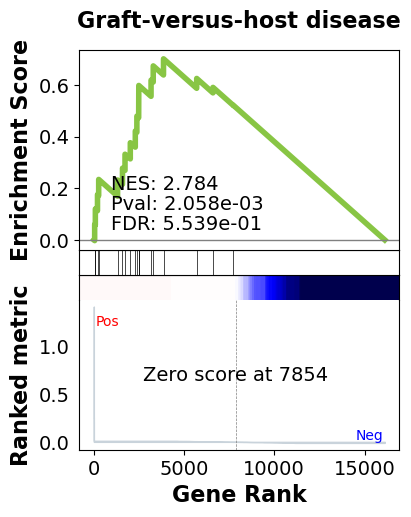

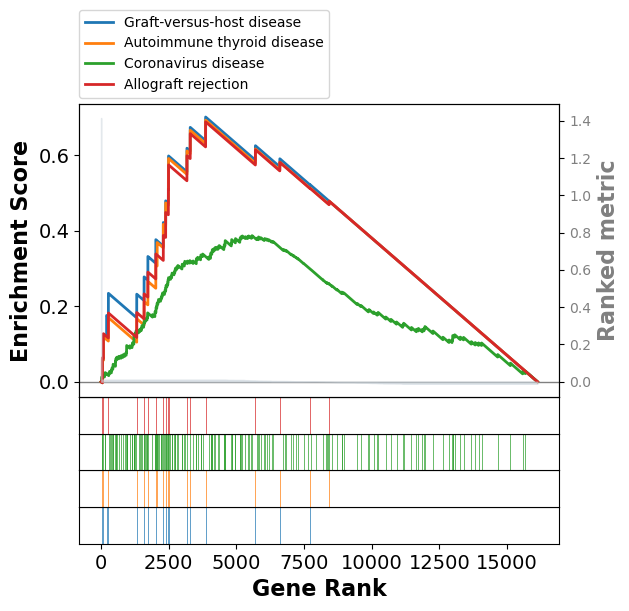

In [103]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[1:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])

In [104]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df_result = result_analysis_B_C

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df_result = df_result.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df_result['ranking_metric'] = -np.log10(df_result['padj']) * np.sign(df_result['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df_result.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./different_expression_output/B_C/ranked_list_B_C.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")

Ranked list saved to 'ranked_list.rnk'.


In [105]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [01:29<00:00, 192.62it/s]


,1
NaN,0.349061
DGCR6,0.349061
IFI6,0.349061
NaN,0.014697
VAX1,0.014697
...,...
CDK2AP1,-0.014697
ARAP3,-0.014697
ACBD7,-0.014697
GSTM2,-0.169610


2024-06-05 19:00:32,011 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-05 19:00:32,035 [INFO] Input gene rankings contains duplicated IDs
2024-06-05 19:00:32,042 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-05 19:00:32,044 [INFO] Parsing data files for GSEA.............................
2024-06-05 19:00:32,045 [INFO] Enrichr library gene sets already downloaded in: /cephyr/users/anwer/Vera/.cache/gseapy, use local file
2024-06-05 19:00:32,070 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-05 19:00:32,072 [INFO] 0317 gene_sets used for further statistical testing.....
2024-06-05 19:00:32,073 [INFO] Start to run GSEA...Might take a while..................
2024-06-05 19:01:04,601 [INFO] Congratulations. GSEApy runs successfully................



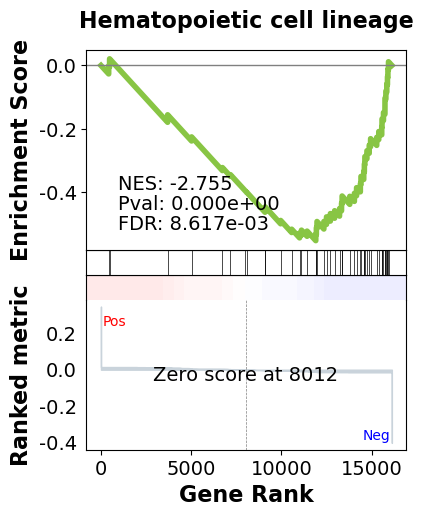

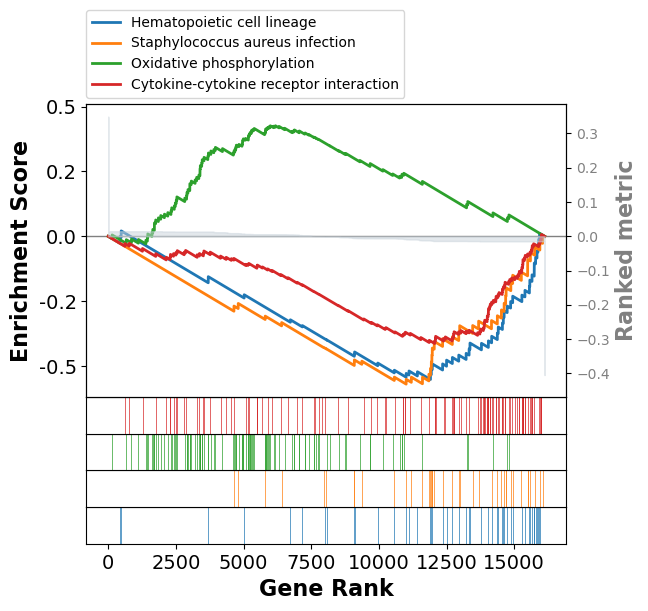

In [106]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[1:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])